In [ ]:
Project Title:-  “Predicting the Mobile Launched Price in (India, Pakistan, China, USA, Dubai)”.

Abstract:- 
This project focuses on predicting the launch price of smartphones based on their technical specifications and market characteristics.
Specifically, we utilize data from Mobile Company Name,  Model Name, Released Year, covering multiple storage variants and regional pricing including Pakistan,
India, China, USA, and Dubai.
The objective is to develop a predictive models that estimates the Launched Price in India, Pakistan, China, USA, Dubai—based on a range of features. 
These include hardware and performance attributes like RAM, camera quality, processor type, battery capacity, and screen size, as well as contextual information like model variant, mobile weight, and launch year.
To achieve this, the dataset is first preprocessed to convert textual and categorical features into machine-readable formats (e.g., RAM: “6GB” → 6, Battery: “3,600mAh” → 3600). Feature engineering and exploratory data analysis (EDA) help uncover relationships and trends influencing the price. Regression models—such as GradientBoostingRegressor, XGBRegressor, LGBMRegressor, CatBoostRegressor by using Stacking Regressor—are trained and evaluated to predict launch prices with accuracy.
This work has real-world implications for smartphone manufacturers, marketers, and retailers, enabling more informed pricing strategies and competitive market analysis.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [5]:
mdata = pd.read_csv(r'D:\AI_DS\python\Project1\MobilesDataset2025.csv', encoding='latin1')
#mdata = pd.read_csv(r'D:\AI_DS\python\Project1\MobilesDataset2025.csv', encoding='ISO-8859-1')

In [6]:
mdata

,Company Name,Model Name,Mobile Weight,RAM,Front Camera,Back Camera,Processor,Battery Capacity,Screen Size,Launched Price (Pakistan),Launched Price (India),Launched Price (China),Launched Price (USA),Launched Price (Dubai),Launched Year
0,Vivo,X5Max 16GB,146g,2GB,5MP,13MP,Snapdragon 615,2300mAh,5.5 inches,"PKR 29,999","INR 16,999","CNY 1,299",USD 199,AED 699,2014
1,Vivo,X3S 16GB,153g,1GB,5MP,13MP,MediaTek MT6592,2000mAh,5.0 inches,"PKR 19,999","INR 10,999",CNY 899,USD 139,AED 499,2014
2,Samsung,Galaxy C9 Pro 64GB,189g,6GB,16MP,16MP + 8MP,Snapdragon 653,4000mAh,6.0 inches,"PKR 65,000","INR 32,990","CNY 3,099",USD 399,"AED 1,299",2016
3,Samsung,Galaxy C5 32GB,143g,4GB,8MP,16MP,Snapdragon 617,2600mAh,5.2 inches,"PKR 40,000","INR 19,990","CNY 1,899",USD 249,AED 799,2016
4,Samsung,Galaxy Tab E 10.1 16GB,490g,1.5GB,2MP,5MP,Spreadtrum SC8830,5000mAh,10.1 inches,"PKR 35,000","INR 9,999",CNY 899,USD 129,AED 499,2016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
925,Realme,14 Pro 5G 256GB,184g,8GB,16MP,50MP + 8MP,MediaTek Dimensity 7300 Energy,"5,800mAh",6.7 inches,"PKR 84,999","INR 31,999","CNY 2,500",USD 340,"AED 1,210",2025
926,Realme,14x 5G 128GB,190g,6GB,16MP,48MP + 2MP + 2MP,Qualcomm Snapdragon 7s Gen 2,"5,500mAh",6.6 inches,"PKR 64,999","INR 24,999","CNY 2,000",USD 270,AED 970,2025
927,Realme,14x 5G 256GB,190g,8GB,16MP,48MP + 2MP + 2MP,Qualcomm Snapdragon 7s Gen 2,"5,500mAh",6.6 inches,"PKR 69,999","INR 26,999","CNY 2,100",USD 290,"AED 1,030",2025
928,POCO,X7 128GB,195g,6GB,16MP,64MP,MediaTek Dimensity 8200,5000mAh,6.67 inches,"PKR 64,999","INR 22,999","CNY 2,199",USD 329,"AED 1,199",2025


In [7]:
mdata.shape

(930, 15)

In [8]:
mdata['Model Name'].dtype  #Object

dtype('O')

In [9]:
mdata.dtypes

Company Name                 object
Model Name                   object
Mobile Weight                object
RAM                          object
Front Camera                 object
Back Camera                  object
Processor                    object
Battery Capacity             object
Screen Size                  object
Launched Price (Pakistan)    object
Launched Price (India)       object
Launched Price (China)       object
Launched Price (USA)         object
Launched Price (Dubai)       object
Launched Year                 int64
dtype: object

In [10]:
mdata.columns

Index(['Company Name', 'Model Name', 'Mobile Weight', 'RAM', 'Front Camera',
       'Back Camera', 'Processor', 'Battery Capacity', 'Screen Size',
       'Launched Price (Pakistan)', 'Launched Price (India)',
       'Launched Price (China)', 'Launched Price (USA)',
       'Launched Price (Dubai)', 'Launched Year'],
      dtype='object')

In [11]:
mdata.index

RangeIndex(start=0, stop=930, step=1)

In [12]:
mdata.head()

,Company Name,Model Name,Mobile Weight,RAM,Front Camera,Back Camera,Processor,Battery Capacity,Screen Size,Launched Price (Pakistan),Launched Price (India),Launched Price (China),Launched Price (USA),Launched Price (Dubai),Launched Year
0,Vivo,X5Max 16GB,146g,2GB,5MP,13MP,Snapdragon 615,2300mAh,5.5 inches,"PKR 29,999","INR 16,999","CNY 1,299",USD 199,AED 699,2014
1,Vivo,X3S 16GB,153g,1GB,5MP,13MP,MediaTek MT6592,2000mAh,5.0 inches,"PKR 19,999","INR 10,999",CNY 899,USD 139,AED 499,2014
2,Samsung,Galaxy C9 Pro 64GB,189g,6GB,16MP,16MP + 8MP,Snapdragon 653,4000mAh,6.0 inches,"PKR 65,000","INR 32,990","CNY 3,099",USD 399,"AED 1,299",2016
3,Samsung,Galaxy C5 32GB,143g,4GB,8MP,16MP,Snapdragon 617,2600mAh,5.2 inches,"PKR 40,000","INR 19,990","CNY 1,899",USD 249,AED 799,2016
4,Samsung,Galaxy Tab E 10.1 16GB,490g,1.5GB,2MP,5MP,Spreadtrum SC8830,5000mAh,10.1 inches,"PKR 35,000","INR 9,999",CNY 899,USD 129,AED 499,2016


In [13]:
mdata.tail()

,Company Name,Model Name,Mobile Weight,RAM,Front Camera,Back Camera,Processor,Battery Capacity,Screen Size,Launched Price (Pakistan),Launched Price (India),Launched Price (China),Launched Price (USA),Launched Price (Dubai),Launched Year
925,Realme,14 Pro 5G 256GB,184g,8GB,16MP,50MP + 8MP,MediaTek Dimensity 7300 Energy,"5,800mAh",6.7 inches,"PKR 84,999","INR 31,999","CNY 2,500",USD 340,"AED 1,210",2025
926,Realme,14x 5G 128GB,190g,6GB,16MP,48MP + 2MP + 2MP,Qualcomm Snapdragon 7s Gen 2,"5,500mAh",6.6 inches,"PKR 64,999","INR 24,999","CNY 2,000",USD 270,AED 970,2025
927,Realme,14x 5G 256GB,190g,8GB,16MP,48MP + 2MP + 2MP,Qualcomm Snapdragon 7s Gen 2,"5,500mAh",6.6 inches,"PKR 69,999","INR 26,999","CNY 2,100",USD 290,"AED 1,030",2025
928,POCO,X7 128GB,195g,6GB,16MP,64MP,MediaTek Dimensity 8200,5000mAh,6.67 inches,"PKR 64,999","INR 22,999","CNY 2,199",USD 329,"AED 1,199",2025
929,POCO,X7 Pro 256GB,207g,8GB,20MP,108MP,MediaTek Dimensity 8400,6000mAh,6.67 inches,"PKR 79,999","INR 27,999","CNY 2,699",USD 399,"AED 1,499",2025


In [14]:
mdata.isnull()

,Company Name,Model Name,Mobile Weight,RAM,Front Camera,Back Camera,Processor,Battery Capacity,Screen Size,Launched Price (Pakistan),Launched Price (India),Launched Price (China),Launched Price (USA),Launched Price (Dubai),Launched Year
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
925,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
926,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
927,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
928,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [15]:
mdata.isnull().sum()

Company Name                 0
Model Name                   0
Mobile Weight                0
RAM                          0
Front Camera                 0
Back Camera                  0
Processor                    0
Battery Capacity             0
Screen Size                  0
Launched Price (Pakistan)    0
Launched Price (India)       0
Launched Price (China)       0
Launched Price (USA)         0
Launched Price (Dubai)       0
Launched Year                0
dtype: int64

In [16]:
mdata.count()

Company Name                 930
Model Name                   930
Mobile Weight                930
RAM                          930
Front Camera                 930
Back Camera                  930
Processor                    930
Battery Capacity             930
Screen Size                  930
Launched Price (Pakistan)    930
Launched Price (India)       930
Launched Price (China)       930
Launched Price (USA)         930
Launched Price (Dubai)       930
Launched Year                930
dtype: int64

In [17]:
mdata.sum()

Company Name                 VivoVivoSamsungSamsungSamsungSamsungVivoAppleA...
Model Name                   X5Max 16GBX3S 16GBGalaxy C9 Pro 64GBGalaxy C5 ...
Mobile Weight                146g153g189g143g490g360g168g174g174g181g165g16...
RAM                          2GB1GB6GB4GB1.5GB1.5GB4GB3GB3GB3GB4GB6GB8GB6GB...
Front Camera                 5MP5MP16MP8MP2MP2MP8MP7MP7MP13MP16MP16MP16MP20...
Back Camera                  13MP13MP16MP + 8MP16MP5MP5MP13MP12MP + 12MP12M...
Processor                    Snapdragon 615MediaTek MT6592Snapdragon 653Sna...
Battery Capacity             2300mAh2000mAh4000mAh2600mAh5000mAh5000mAh3000...
Screen Size                  5.5 inches5.0 inches6.0 inches5.2 inches10.1 i...
Launched Price (Pakistan)    PKR 29,999PKR 19,999PKR 65,000PKR 40,000PKR 35...
Launched Price (India)       INR 16,999INR 10,999INR 32,990INR 19,990INR 9,...
Launched Price (China)       CNY 1,299CNY 899CNY 3,099CNY 1,899CNY 899CNY 7...
Launched Price (USA)         USD 199USD 139USD 399US

In [19]:
mdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 930 entries, 0 to 929
Data columns (total 15 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Company Name               930 non-null    object
 1   Model Name                 930 non-null    object
 2   Mobile Weight              930 non-null    object
 3   RAM                        930 non-null    object
 4   Front Camera               930 non-null    object
 5   Back Camera                930 non-null    object
 6   Processor                  930 non-null    object
 7   Battery Capacity           930 non-null    object
 8   Screen Size                930 non-null    object
 9   Launched Price (Pakistan)  930 non-null    object
 10  Launched Price (India)     930 non-null    object
 11  Launched Price (China)     930 non-null    object
 12  Launched Price (USA)       930 non-null    object
 13  Launched Price (Dubai)     930 non-null    object
 14  Launched Y

In [20]:
mdata.describe()

,Launched Year
count,930.000000
mean,2022.193548
std,1.862080
min,2014.000000
25%,2021.000000
50%,2023.000000
75%,2024.000000
max,2025.000000



Here is complete preprocessing code for all features in my mobile dataset, including:
Cleaning numeric values (e.g., "8GB", "3000mAh", "5.5 inches")
Parsing camera specs (e.g., "16MP + 8MP")
Encoding categorical columns (Company Name, Model Name, Processor)
Converting all prices to numeric (e.g., "USD 199")


In [2]:
import pandas as pd
import numpy as np
import re
from sklearn.preprocessing import LabelEncoder

# ---------- Utility Functions ---------- 

# Remove units like 'GB', 'MP', 'mAh', etc.
def clean_numeric(val, unit_pattern=r"[a-zA-Z, ₹$AEDUSDINRPYCN¥ ]+"):
    if pd.isna(val) or "Not" in str(val):
        return np.nan
    try:
        return float(re.sub(unit_pattern, "", str(val)))
    except:
        return np.nan

# Convert camera string to total megapixels
def parse_camera(mp_string):
    if pd.isna(mp_string):
        return np.nan
    mp_values = re.findall(r"\d+", str(mp_string))
    return sum(map(int, mp_values))

# ---------- Main Preprocessing Function ---------- 

def preprocess_mobile_data(df):
    df = df.copy()
    
    # Strip all column names of extra spaces
    df.columns = df.columns.str.strip()

    # Optional: print to verify columns
    print("Available columns:", df.columns.tolist())

    # Mapping column names based on your sample
    col_map = {
        "Mobile Weight": "Mobile Weight(gm)",
        "RAM": "RAM(GB)",
        "Front Camera": "Front Camera(MP)",
        "Back Camera": "Back Camera(MP)",
        "Battery Capacity": "Battery Capacity(mAh)",
        "Screen Size": "Screen Size(inches)",
        "Launched Price (Pakistan)": "Price PKR",
        "Launched Price (India)": "Price INR",
        "Launched Price (China)": "Price CNY",
        "Launched Price (USA)": "Price USD",
        "Launched Price (Dubai)": "Price AED",
        "Launched Year": "Launched Year",
    }

    # Rename the columns for simplicity
    df.rename(columns=col_map, inplace=True)

    # Clean numeric fields
    df["Mobile Weight(gm)"] = df["Mobile Weight(gm)"].apply(clean_numeric)
    df["RAM(GB)"] = df["RAM(GB)"].apply(clean_numeric)
    df["Front Camera(MP)"] = df["Front Camera(MP)"].apply(parse_camera)
    df["Back Camera(MP)"] = df["Back Camera(MP)"].apply(parse_camera)
    df["Battery Capacity(mAh)"] = df["Battery Capacity(mAh)"].apply(clean_numeric)
    df["Screen Size(inches)"] = df["Screen Size(inches)"].apply(clean_numeric)
    df["Price PKR"] = df["Price PKR"].apply(clean_numeric)
    df["Price INR"] = df["Price INR"].apply(clean_numeric)
    df["Price CNY"] = df["Price CNY"].apply(clean_numeric)
    df["Price USD"] = df["Price USD"].apply(clean_numeric)
    df["Price AED"] = df["Price AED"].apply(clean_numeric)

    # Launch year
    df["Launched Year"] = pd.to_numeric(df["Launched Year"], errors='coerce')

    # Label encode
    from sklearn.preprocessing import LabelEncoder
    label_encoders = {}
    for col in ["Company Name", "Model Name", "Processor"]:
        le = LabelEncoder()
        df[col] = le.fit_transform(df[col].astype(str))
        label_encoders[col] = le

    return df, label_encoders


Access the Preprocess Mobile Data

In [3]:
df = pd.read_csv(r'D:\AI_DS\python\Project1\MobilesDataset2025.csv', encoding='latin1')  
print(df.columns.tolist())
df_cleaned, encoders = preprocess_mobile_data(df)

print(df_cleaned.head(10))


['Company Name', 'Model Name', 'Mobile Weight', 'RAM', 'Front Camera', 'Back Camera', 'Processor', 'Battery Capacity', 'Screen Size', 'Launched Price (Pakistan)', 'Launched Price (India)', 'Launched Price (China)', 'Launched Price (USA)', 'Launched Price (Dubai)', 'Launched Year']
Available columns: ['Company Name', 'Model Name', 'Mobile Weight', 'RAM', 'Front Camera', 'Back Camera', 'Processor', 'Battery Capacity', 'Screen Size', 'Launched Price (Pakistan)', 'Launched Price (India)', 'Launched Price (China)', 'Launched Price (USA)', 'Launched Price (Dubai)', 'Launched Year']
   Company Name  Model Name  Mobile Weight(gm)  RAM(GB)  Front Camera(MP)  \
0            16         733              146.0      2.0                 5   
1            16         725              153.0      1.0                 5   
2            13         170              189.0      6.0                16   
3            13         168              143.0      4.0                 8   
4            13         222     

Save Cleaned Data

In [4]:
# Save cleaned DataFrame to a new CSV file
df_cleaned.to_csv(r'D:\AI_DS\python\Project1\MobilesDataset2025_cleaned.csv', index=False, encoding='utf-8')

print("Cleaned data saved to MobilesDataset2025_cleaned.csv")


Cleaned data saved to MobilesDataset2025_cleaned.csv


In [5]:
data=pd.read_csv("MobilesDataset2025_cleaned.csv")
data

,Company Name,Model Name,Mobile Weight(gm),RAM(GB),Front Camera(MP),Back Camera(MP),Processor,Battery Capacity(mAh),Screen Size(inches),Price PKR,Price INR,Price CNY,Price USD,Price AED,Launched Year
0,16,733,146.0,2.0,5,13,162,2300.0,5.50,29999.0,16999.0,1299.0,199.0,699.0,2014
1,16,725,153.0,1.0,5,13,109,2000.0,5.00,19999.0,10999.0,899.0,139.0,499.0,2014
2,13,170,189.0,6.0,16,24,168,4000.0,6.00,65000.0,32990.0,3099.0,399.0,1299.0,2016
3,13,168,143.0,4.0,8,16,163,2600.0,5.20,40000.0,19990.0,1899.0,249.0,799.0,2016
4,13,222,490.0,1.5,2,5,207,5000.0,10.10,35000.0,9999.0,899.0,129.0,499.0,2016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
925,12,10,184.0,8.0,16,58,67,5800.0,6.70,84999.0,31999.0,2500.0,340.0,1210.0,2025
926,12,13,190.0,6.0,16,52,139,5500.0,6.60,64999.0,24999.0,2000.0,270.0,970.0,2025
927,12,14,190.0,8.0,16,52,139,5500.0,6.60,69999.0,26999.0,2100.0,290.0,1030.0,2025
928,10,740,195.0,6.0,16,64,77,5000.0,6.67,64999.0,22999.0,2199.0,329.0,1199.0,2025


In [6]:
pip install xgboost lightgbm catboost scikit-learn pandas

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [7]:
import pandas as pd

# Define Features (X) and Multi Targets (y)
X = data.drop(columns=['Price USD', 'Price INR', 'Price PKR', 'Price CNY', 'Price AED'])
y = data[['Price USD', 'Price INR', 'Price PKR', 'Price CNY', 'Price AED']]

To Check NaNs in independent Variables

In [8]:
X.isna().sum() # Shows how many NaNs are in each independent column

Company Name             0
Model Name               0
Mobile Weight(gm)        0
RAM(GB)                  2
Front Camera(MP)         0
Back Camera(MP)          0
Processor                0
Battery Capacity(mAh)    0
Screen Size(inches)      8
Launched Year            0
dtype: int64

To Check NaNs in Dependent/Target Variables

In [9]:
y.isna().sum() # Shows how many NaNs are in each target column

Price USD    0
Price INR    0
Price PKR    1
Price CNY    0
Price AED    0
dtype: int64

Imputing in X

In [10]:
# Show rows in X that have any NaN
X[X.isna().any(axis=1)]

,Company Name,Model Name,Mobile Weight(gm),RAM(GB),Front Camera(MP),Back Camera(MP),Processor,Battery Capacity(mAh),Screen Size(inches),Launched Year
250,3,493,190.0,8.0,17,40,205,4000.0,NaN,2021
252,3,348,295.0,8.0,16,50,45,4500.0,NaN,2021
394,3,353,255.0,8.0,17,50,205,4600.0,NaN,2022
556,6,589,192.0,8.0,32,50,195,3500.0,NaN,2023
557,6,590,192.0,12.0,32,50,195,3500.0,NaN,2023
565,3,498,200.0,NaN,13,109,196,4815.0,6.67,2023
566,3,497,206.0,NaN,13,136,196,5100.0,6.73,2023
567,3,349,239.0,12.0,8,75,196,4800.0,NaN,2023
790,6,592,189.0,12.0,32,50,195,4000.0,NaN,2024
791,6,591,188.0,8.0,32,50,177,3800.0,NaN,2024


In [11]:
X.iloc[246:256]

,Company Name,Model Name,Mobile Weight(gm),RAM(GB),Front Camera(MP),Back Camera(MP),Processor,Battery Capacity(mAh),Screen Size(inches),Launched Year
246,5,290,190.0,2.0,5,13,209,5000.0,6.52,2021
247,5,291,200.0,4.0,8,48,156,5000.0,6.50,2021
248,3,492,181.0,8.0,13,50,205,4100.0,6.50,2021
249,3,494,195.0,8.0,13,50,205,4360.0,6.60,2021
250,3,493,190.0,8.0,17,40,205,4000.0,NaN,2021
251,3,339,188.0,8.0,13,64,50,4200.0,6.50,2021
252,3,348,295.0,8.0,16,50,45,4500.0,NaN,2021
253,3,426,175.0,8.0,32,50,187,4300.0,6.57,2021
254,3,427,186.0,8.0,32,50,187,4000.0,6.72,2021
255,7,140,197.0,4.0,8,48,86,5050.0,6.52,2021


In [12]:
# fill NaNs in particular row 
X.loc[250] = X.loc[250].fillna(6.50)
X.loc[252] = X.loc[252].fillna(6.50)

In [13]:
X.iloc[391:398]

,Company Name,Model Name,Mobile Weight(gm),RAM(GB),Front Camera(MP),Back Camera(MP),Processor,Battery Capacity(mAh),Screen Size(inches),Launched Year
391,6,360,169.0,4.0,5,16,95,4020.0,6.50,2022
392,6,373,185.0,4.0,16,50,95,5000.0,6.50,2022
393,3,495,181.0,8.0,13,50,187,4100.0,6.50,2022
394,3,353,255.0,8.0,17,50,205,4600.0,NaN,2022
395,3,340,202.0,8.0,13,50,196,4460.0,6.70,2022
396,3,341,205.0,8.0,13,50,196,4700.0,6.74,2022
397,3,414,168.0,8.0,60,50,187,4000.0,6.67,2022


In [14]:
# fill NaNs in particular row 
X.loc[394] = X.loc[394].fillna(6.50)

In [15]:
X.iloc[553:560]

,Company Name,Model Name,Mobile Weight(gm),RAM(GB),Front Camera(MP),Back Camera(MP),Processor,Battery Capacity(mAh),Screen Size(inches),Launched Year
553,17,752,206.0,12.0,32,150,194,5000.0,6.73,2023
554,17,749,189.0,12.0,32,100,194,4610.0,6.36,2023
555,17,750,189.0,12.0,32,100,194,4610.0,6.36,2023
556,6,589,192.0,8.0,32,50,195,3500.0,NaN,2023
557,6,590,192.0,12.0,32,50,195,3500.0,NaN,2023
558,6,145,166.0,8.0,16,50,173,5000.0,6.50,2023
559,6,146,166.0,12.0,16,50,173,5000.0,6.50,2023


In [16]:
# fill NaNs in particular row 
X.loc[556] = X.loc[556].fillna(6.36)
X.loc[557] = X.loc[557].fillna(6.50)

In [17]:
X.iloc[562:570]

,Company Name,Model Name,Mobile Weight(gm),RAM(GB),Front Camera(MP),Back Camera(MP),Processor,Battery Capacity(mAh),Screen Size(inches),Launched Year
562,6,364,198.0,4.0,8,48,215,5000.0,6.50,2023
563,6,363,198.0,6.0,8,48,215,5000.0,6.50,2023
564,3,496,197.0,8.0,13,109,196,4815.0,6.67,2023
565,3,498,200.0,NaN,13,109,196,4815.0,6.67,2023
566,3,497,206.0,NaN,13,136,196,5100.0,6.73,2023
567,3,349,239.0,12.0,8,75,196,4800.0,NaN,2023
568,3,342,209.0,12.0,13,74,46,4750.0,6.70,2023
569,3,343,225.0,12.0,13,138,46,5000.0,6.82,2023


In [18]:
# fill NaNs in particular row 
X.loc[565:567] = X.loc[565:567].fillna(12.0)

In [19]:
# fill NaNs in particular row 
X.loc[567] = X.loc[567].fillna(6.67)

In [20]:
X.iloc[787:795]

,Company Name,Model Name,Mobile Weight(gm),RAM(GB),Front Camera(MP),Back Camera(MP),Processor,Battery Capacity(mAh),Screen Size(inches),Launched Year
787,6,379,183.0,8.0,16,50,176,5000.0,6.50,2024
788,6,94,180.0,8.0,32,50,189,4700.0,6.70,2024
789,6,95,180.0,12.0,32,50,189,4700.0,6.70,2024
790,6,592,189.0,12.0,32,50,195,4000.0,NaN,2024
791,6,591,188.0,8.0,32,50,177,3800.0,NaN,2024
792,6,388,173.0,8.0,32,50,176,5000.0,6.67,2024
793,6,389,173.0,12.0,32,50,176,5000.0,6.67,2024
794,6,650,170.0,8.0,32,50,65,4300.0,6.50,2024


In [21]:
# fill NaNs in particular row 
X.loc[790] = X.loc[790].fillna(6.70)
X.loc[791] = X.loc[791].fillna(6.67)

Imputing in y

In [22]:
# Show rows in y that have any NaN
y[y.isna().any(axis=1)]

,Price USD,Price INR,Price PKR,Price CNY,Price AED
917,2259.0,200999.0,NaN,17999.0,8699.0


In [23]:
y.iloc[914:921]

,Price USD,Price INR,Price PKR,Price CNY,Price AED
914,300.0,25999.0,71220.0,2299.0,1099.0
915,1899.0,164999.0,604999.0,13999.0,7199.0
916,1719.0,176999.0,544999.0,15999.0,7699.0
917,2259.0,200999.0,NaN,17999.0,8699.0
918,499.0,44999.0,79999.0,3499.0,1899.0
919,499.0,44999.0,79999.0,3499.0,1899.0
920,799.0,69999.0,129999.0,5999.0,2999.0


In [24]:
# fill NaNs in particular row 
#y = df[['Price USD', 'Price INR', 'Price PKR', 'Price CNY', 'Price AED']].copy()#Now y is fully independent, and this will work safely
y.loc[917] = y.loc[917].fillna(600000.0)

Show the X After Imputing

In [25]:
X.isna().sum() # Shows how many NaNs are in each independent column

Company Name             0
Model Name               0
Mobile Weight(gm)        0
RAM(GB)                  0
Front Camera(MP)         0
Back Camera(MP)          0
Processor                0
Battery Capacity(mAh)    0
Screen Size(inches)      0
Launched Year            0
dtype: int64

In [ ]:
Show the y After Imputing

In [26]:
y.isna().sum() # Shows how many NaNs are in each target column

Price USD    0
Price INR    0
Price PKR    0
Price CNY    0
Price AED    0
dtype: int64

Concatenate the X and y

In [27]:
merged_Xy_with_fillna = pd.concat([X, y], axis=1)

Save the CSV file (MobilesDataset2025_final)

In [28]:
# Save merged_Xy_with_fillna to a new CSV file
merged_Xy_with_fillna.to_csv(r'D:\AI_DS\python\Project1\MobilesDataset2025_final.csv', index=False, encoding='utf-8')

print("data saved to MobilesDataset2025_final.csv")


data saved to MobilesDataset2025_final.csv


In [ ]:
Save the CSV file (X)

In [29]:
# Save merged_Xy_with_fillna to a new CSV file
X.to_csv(r'D:\AI_DS\python\Project1\MobilesDataset2025_final_X.csv', index=False, encoding='utf-8')

print("data saved to MobilesDataset2025_final_X.csv")

data saved to MobilesDataset2025_final_X.csv


In [ ]:
Save the CSV file (y)

In [30]:
# Save merged_Xy_with_fillna to a new CSV file
y.to_csv(r'D:\AI_DS\python\Project1\MobilesDataset2025_final_y.csv', index=False, encoding='utf-8')

print("data saved to MobilesDataset2025_final_y.csv")

data saved to MobilesDataset2025_final_y.csv


Using Stacking Regressor with 1. GradientBoostingRegressor, 2. XGBRegressor, 3. LGBMRegressor, 4. CatBoostRegressor

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor, StackingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.multioutput import MultiOutputRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor

# Load your dataset
df = pd.read_csv("MobilesDataset2025_final.csv")  # Update this with your actual filename

# Optionally encode any categorical features (like 'Company' or 'Model Name')
from sklearn.preprocessing import LabelEncoder

for col in ['Company Name', 'Model Name']:  # Adjust column names as per your data
    if df[col].dtype == 'object':
        df[col] = LabelEncoder().fit_transform(df[col])

# Define Features (X) and Multi Targets (y)
X = df.drop(columns=['Price USD', 'Price INR', 'Price PKR', 'Price CNY', 'Price AED'])
y = df[['Price USD', 'Price INR', 'Price PKR', 'Price CNY', 'Price AED']]
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define Base Models
base_models = [
    ('gbr', GradientBoostingRegressor(n_estimators=100, random_state=42)),
    ('xgb', XGBRegressor(n_estimators=100, verbosity=0, random_state=42)),
    ('lgb', LGBMRegressor(n_estimators=100, random_state=42)),
    ('cat', CatBoostRegressor(n_estimators=100, verbose=0, random_state=42))
]

# Meta-model
meta_model = LinearRegression()

# Stacking Regressor
stacking_model = StackingRegressor(
    estimators=base_models,
    final_estimator=meta_model,
    passthrough=True,
    cv=5
)

# MultiOutput Wrapper
multi_output_model = MultiOutputRegressor(stacking_model)

# Train the model
multi_output_model.fit(X_train, y_train)

# Test 
y_pred = multi_output_model.predict(X_test)

from sklearn.metrics import (
    r2_score, mean_absolute_error, mean_squared_error, 
    mean_absolute_percentage_error, median_absolute_error, 
    explained_variance_score, max_error, mean_squared_log_error
)
import numpy as np

# Define regression metrics
metrics = {
    "R²": r2_score,
    "MAE": mean_absolute_error,
    "MSE": mean_squared_error,
    "RMSE": lambda y_true, y_pred: np.sqrt(mean_squared_error(y_true, y_pred)),
    "MAPE": lambda y_true, y_pred: mean_absolute_percentage_error(y_true, y_pred) * 100,  # % form
    "Accuracy (%)": lambda y_true, y_pred: 100 - (mean_absolute_percentage_error(y_true, y_pred) * 100),  # derived %
    "MedAE": median_absolute_error,
    "EVS": explained_variance_score,
    "MaxErr": max_error,
    "MSLE": lambda y_true, y_pred: mean_squared_log_error(np.maximum(0, y_true), np.maximum(0, y_pred))
}

# Print header row
header = " | ".join(["Target"] + list(metrics.keys()))
print(header)
print("-" * len(header))

# Loop through each target and compute all metrics
for i, target in enumerate(y.columns):
    y_true = y_test.iloc[:, i]
    y_pred_i = y_pred[:, i]

    scores = []
    for name, func in metrics.items():
        try:
            score = func(y_true, y_pred_i)
            scores.append(f"{score:.4f}")
        except ValueError as e:
            scores.append("Error")

    print(f"{target} | " + " | ".join(scores))

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000446 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 700
[LightGBM] [Info] Number of data points in the train set: 744, number of used features: 10
[LightGBM] [Info] Start training from score 645.044207
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best g

This is Output of 5 targer Varibles

Target    | R²     | MAE      | MSE        | RMSE     | MAPE    | Accuracy (%) | MedAE| EVS   | MaxErr   | MSLE
----------------------------------------------------------------------------------
Price USD | 0.5053 | 202.1738 | 71482.6876 | 267.3625 | 57.3531 | 42.6469 | 142.9431 | 0.5344 | 779.9737 | 0.4799
Price INR | 0.9113 | 7288.3956 | 124224203.6619 | 11145.5912 | 17.7239 | 82.2761 | 4950.5250 | 0.9114 | 61454.1095 | 0.0512
Price PKR | 0.9547 | 15147.1131 | 489122733.3449 | 22116.1193 | 15.1231 | 84.8769 | 10200.0518 | 0.9554 | 101300.8684 | 0.0378
Price CNY | 0.9095 | 502.4406 | 599075.1335 | 773.9994 | 15.1061 | 84.8939 | 343.1901 | 0.9099 | 4100.0948 | 0.0366
Price AED | 0.9125 | 256.7885 | 170813.0827 | 413.2954 | 13.3274 | 86.6726 | 153.2745 | 0.9128 | 2809.6195 | 0.0307

in Price USD have very low accuracy 42% so, have to Boxplot of Target Price Columns (Outlier Detection)

In [ ]:
| Metric     | Full Name                                | Purpose & Interpretation                                                                                                                                                                                                                                           |
| ---------- | ---------------------------------------- | ------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------ |
| **R²**     | Coefficient of Determination (R-squared) | Measures how well the model explains the variance in the target. <br>🔹 Value ranges from **-∞ to 1**. <br>🔹 **1** means perfect prediction. <br>🔹 **0** means model does no better than the mean. <br>🔹 Negative values mean the model is worse than the mean. |
| **MAE**    | Mean Absolute Error                      | Measures the average absolute difference between actual and predicted values. <br>🔹 Easy to interpret in the same units as the target. <br>🔹 Less sensitive to outliers than MSE.                                                                                |
| **MSE**    | Mean Squared Error                       | Measures the average of the squared differences between actual and predicted values. <br>🔹 Penalizes large errors more than MAE. <br>🔹 Used for optimization in many algorithms.                                                                                 |
| **RMSE**   | Root Mean Squared Error                  | Square root of MSE. <br>🔹 Same units as the target. <br>🔹 Emphasizes larger errors (like MSE), but easier to interpret. <br>🔹 Useful for comparing model fit to observed data scale.                                                                            |
| **MAPE**   | Mean Absolute Percentage Error           | Measures average absolute percentage error between actual and predicted. <br>🔹 Useful when targets vary greatly in scale. <br>🔹 **Expressed as %**, e.g., 12.5% error. <br>🔺 Not reliable when actual values are near zero.                                     |
| **MedAE**  | Median Absolute Error                    | Median of all absolute errors. <br>🔹 More robust to outliers than MAE. <br>🔹 Tells you the "typical" size of an error.                                                                                                                                           |
| **EVS**    | Explained Variance Score                 | Measures how much of the variance is explained by the model. <br>🔹 Similar to R² but doesn't penalize systematic bias. <br>🔹 **1** is perfect, lower is worse.                                                                                                   |
| **MaxErr** | Maximum Error                            | Largest single absolute error between predicted and actual values. <br>🔹 Shows worst-case performance. <br>🔺 Sensitive to outliers.                                                                                                                              |
| **MSLE**   | Mean Squared Log Error                   | Measures squared log difference between actual and predicted. <br>🔹 Emphasizes **under-predictions** more than over-predictions. <br>🔹 Useful when predicting quantities that grow exponentially (e.g., population, sales). <br>🔺 Requires non-negative values. |


In [ ]:
| Metric     | Gives Percentage? | Explanation                                                                                                                                |
| ---------- | ----------------- | ------------------------------------------------------------------------------------------------------------------------------------------ |
| **R²**     | ❌ No              | It's a ratio (range: −∞ to 1), not a percentage, though you can multiply by 100 for rough % of variance explained.                         |
| **MAE**    | ❌ No              | Absolute error in the **same units** as the target.                                                                                        |
| **MSE**    | ❌ No              | Squared error in **squared units** (e.g., cm², dollars²).                                                                                  |
| **RMSE**   | ❌ No              | Same units as target (like MAE), not percentage.                                                                                           |
| **MAPE**   | ✅ **Yes**         | **Mean Absolute Percentage Error** — this gives you error as a percentage, so you can directly say: "**Model is off by \~8% on average.**" |
| **MedAE**  | ❌ No              | Median absolute error — again, in target units.                                                                                            |
| **EVS**    | ❌ No              | Ratio (like R²), not percentage.                                                                                                           |
| **MaxErr** | ❌ No              | Error in target units (e.g., biggest mistake = 1500 kg).                                                                                   |
| **MSLE**   | ❌ No              | Based on log difference — not a percentage, and not easily interpretable as one.                                                           |


In [ ]:
| Metric             | % Based | Can Interpret as Accuracy? | Comment                                 |
| ------------------ | ------- | -------------------------- | --------------------------------------- |
| MAPE               | ✅ Yes   | ✅ Yes (100 - MAPE)         | Most common and intuitive               |
| SMAPE              | ✅ Yes   | ✅ Yes (100 - SMAPE)        | Better with skewed or small values      |
| Threshold Accuracy | ✅ Yes   | ✅ Yes                      | Custom accuracy range (e.g., within 5%) |
| R² × 100           | ✅ No    | ⚠️ Approximate             | Not a true accuracy, but widely used    |


# Evaluate R² score on each output
from sklearn.metrics import r2_score

# Display R² for each target
for i, target in enumerate(y.columns):
    score = r2_score(y_test.iloc[:, i], y_pred[:, i])
    print(f"{target} R² Score: {score:.4f}") 

Outlier Detection & Remove Outliers

1. Boxplot of Target Price Columns (Outlier Detection)



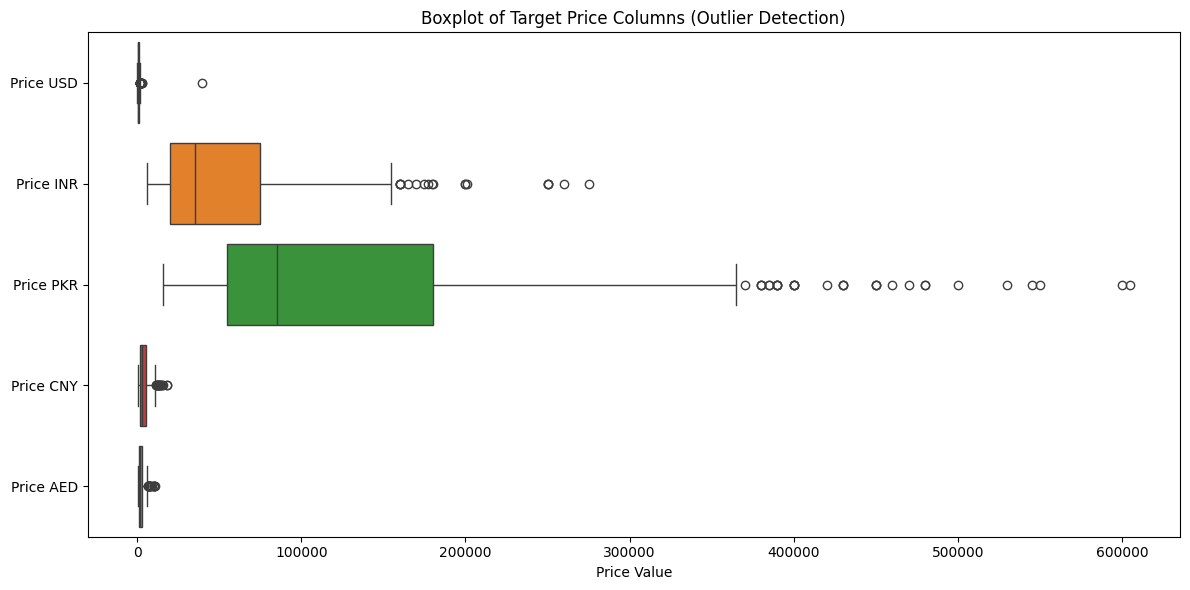

           count           mean            std      min       25%      50%  \
Price USD  930.0     625.515763    1347.561211     79.0    250.00    449.0   
Price INR  930.0   50576.818280   40960.179361   5999.0  19999.00  34999.0   
Price PKR  930.0  125946.347312  102724.369362  15999.0  54999.00  85000.0   
Price CNY  930.0    3821.430108    2766.076655    499.0   1699.25   2800.0   
Price AED  930.0    2183.933333    1565.631642    299.0   1000.00   1675.0   

                75%       max  
Price USD     849.0   39622.0  
Price INR   74900.0  274999.0  
Price PKR  179999.0  604999.0  
Price CNY    5499.0   17999.0  
Price AED    3199.0   11099.0  

 2. Boxplot of Target Price Columns (Remove Outliers)



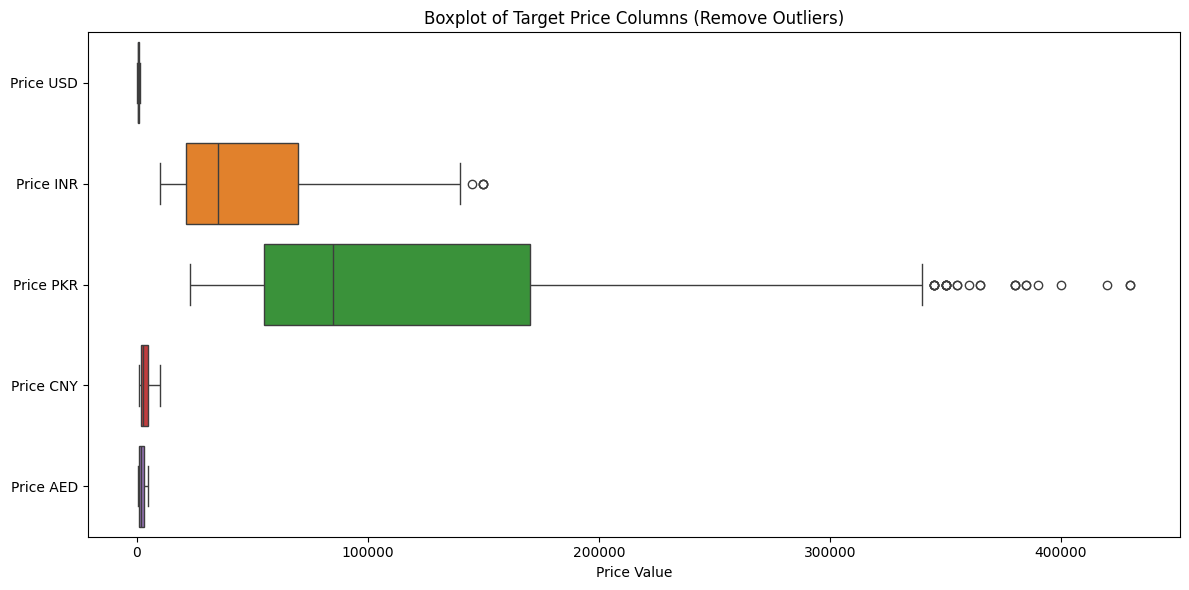

           count           mean           std      min      25%      50%  \
Price USD  845.0     546.046935    328.271695    149.0    279.0    449.0   
Price INR  845.0   47114.848521  32842.949395   9999.0  21400.0  34999.0   
Price PKR  845.0  117513.813018  84796.798123  22999.0  54999.0  84999.0   
Price CNY  845.0    3591.382249   2211.969305    999.0   1799.0   2800.0   
Price AED  845.0    2041.382249   1193.980210    580.0   1099.0   1675.0   

                75%       max  
Price USD     799.0    1399.0  
Price INR   69900.0  149999.0  
Price PKR  169999.0  430000.0  
Price CNY    4999.0    9799.0  
Price AED    2999.0    4999.0  


In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv("MobilesDataset2025_final.csv")  # Update path

# Target price columns
target_cols = ['Price USD', 'Price INR', 'Price PKR', 'Price CNY', 'Price AED']
print('1. Boxplot of Target Price Columns (Outlier Detection)\n')
# ─── Boxplot to detect outliers in all target columns ───
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[target_cols], orient='h')
plt.title("Boxplot of Target Price Columns (Outlier Detection)")
plt.xlabel("Price Value")
plt.tight_layout()
plt.show()
print(df[target_cols].describe().T)
# ─── Remove outliers from each target column ───
for col in target_cols:
    q_low = df[col].quantile(0.01)
    q_high = df[col].quantile(0.99)
    df = df[(df[col] >= q_low) & (df[col] <= q_high)]

print('\n 2. Boxplot of Target Price Columns (Remove Outliers)\n')
# ───  Boxplot to detect outliers in all target columns in Remove outliers ───
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[target_cols], orient='h')
plt.title("Boxplot of Target Price Columns (Remove Outliers)")
plt.xlabel("Price Value")
plt.tight_layout()
plt.show()
print(df[target_cols].describe().T)

Using Stacking Regressor with 1. GradientBoostingRegressor, 2. XGBRegressor, 3. LGBMRegressor, 4. CatBoostRegressor with Remove Outliers

In [8]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import GradientBoostingRegressor, StackingRegressor
from sklearn.linear_model import Ridge
from sklearn.multioutput import MultiOutputRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor
from sklearn.metrics import (
    r2_score, mean_absolute_error, mean_squared_error, 
    mean_absolute_percentage_error, median_absolute_error, 
    explained_variance_score, max_error, mean_squared_log_error
)

# Load dataset
df = pd.read_csv("MobilesDataset2025_final.csv")  # Update path

# Encode categorical features
for col in ['Company Name', 'Model Name']:  # Adjust as needed
    if df[col].dtype == 'object':
        df[col] = LabelEncoder().fit_transform(df[col])

# Optional Feature Engineering
if 'RAM' in df.columns and 'ROM' in df.columns:
    df['RAM_ROM_ratio'] = df['RAM'] / (df['ROM'] + 1)

if {'Resolution_Width', 'Resolution_Height', 'Screen_Size'}.issubset(df.columns):
    df['Screen_PPI'] = ((df['Resolution_Width']**2 + df['Resolution_Height']**2)**0.5) / (df['Screen_Size'] + 1)

# Remove outliers from each target column
for col in ['Price USD', 'Price INR', 'Price PKR', 'Price CNY', 'Price AED']:
    q_low = df[col].quantile(0.01)
    q_high = df[col].quantile(0.99)
    df = df[(df[col] >= q_low) & (df[col] <= q_high)]

# Features and Targets
X = df.drop(columns=['Price USD', 'Price INR', 'Price PKR', 'Price CNY', 'Price AED'])
y = df[['Price USD', 'Price INR', 'Price PKR', 'Price CNY', 'Price AED']]

# Feature Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Base models with tuning
base_models = [
    ('gbr', GradientBoostingRegressor(n_estimators=200, learning_rate=0.1, random_state=42)),
    ('xgb', XGBRegressor(n_estimators=200, learning_rate=0.1, verbosity=0, random_state=42)),
    ('lgb', LGBMRegressor(n_estimators=200, learning_rate=0.1, random_state=42)),
    ('cat', CatBoostRegressor(n_estimators=200, learning_rate=0.1, verbose=0, random_state=42))
]

# Improved meta-model
meta_model = Ridge()

# Stacking Regressor
stacking_model = StackingRegressor(
    estimators=base_models,
    final_estimator=meta_model,
    passthrough=True,
    cv=5
)

# MultiOutput wrapper
multi_output_model = MultiOutputRegressor(stacking_model)

# Train the model
multi_output_model.fit(X_train, y_train)

# Predict
y_pred = multi_output_model.predict(X_test)

# Regression Metrics
metrics = {
    "R²": r2_score,
    "MAE": mean_absolute_error,
    "MSE": mean_squared_error,
    "RMSE": lambda y_true, y_pred: np.sqrt(mean_squared_error(y_true, y_pred)),
    "MAPE": lambda y_true, y_pred: mean_absolute_percentage_error(y_true, y_pred) * 100,
    "Accuracy (%)": lambda y_true, y_pred: 100 - (mean_absolute_percentage_error(y_true, y_pred) * 100),
    "MedAE": median_absolute_error,
    "EVS": explained_variance_score,
    "MaxErr": max_error,
    "MSLE": lambda y_true, y_pred: mean_squared_log_error(np.maximum(0, y_true), np.maximum(0, y_pred))
}

# Print metrics
header = " | ".join(["Target"] + list(metrics.keys()))
print(header)
print("-" * len(header))

for i, target in enumerate(y.columns):
    y_true = y_test.iloc[:, i]
    y_pred_i = y_pred[:, i]

    scores = []
    for name, func in metrics.items():
        try:
            score = func(y_true, y_pred_i)
            scores.append(f"{score:.4f}")
        except ValueError:
            scores.append("Error")

    print(f"{target} | " + " | ".join(scores))


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000350 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 636
[LightGBM] [Info] Number of data points in the train set: 676, number of used features: 10
[LightGBM] [Info] Start training from score 552.788299
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, 

This is Final Output Because of all target variables are between 80% - 90% Accuracy

Target    | R²     | MAE     | MSE       | RMSE    | MAPE    | Accuracy(%)| MedAE | EVS   | MaxErr    | MSLE
----------------------------------------------------------------------------------
Price USD | 0.9361 | 59.6407 | 6739.2763 | 82.0931 | 13.7278 | 86.2722 | 38.5003 | 0.9362 | 310.4645 | 0.0387
Price INR | 0.9429 | 5789.7916 | 61430660.7355 | 7837.7714 | 16.7972 | 83.2028 | 4437.9305 | 0.9436 | 30292.1717 | 0.0500
Price PKR | 0.9421 | 13867.6672 | 376451724.1722 | 19402.3639 | 16.5808 | 83.4192 | 10130.2563 | 0.9429 | 78802.7846 | 0.0499
Price CNY | 0.9513 | 340.9687 | 229543.1530 | 479.1066 | 12.1014 | 87.8986 | 229.0520 | 0.9514 | 1754.5290 | 0.0316
Price AED | 0.9337 | 208.5631 | 91108.8730 | 301.8425 | 12.7556 | 87.2444 | 127.1476 | 0.9340 | 1018.9750 | 0.0379

Data Visualization to outputs ( Model Evaluation Metrics per Target, Accuracy (%) by Target Variable, MAE and RMSE Comparison )

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_11104\571747930.py:26: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\ADMIN\AppData\Local\Programs\Python\Python313\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


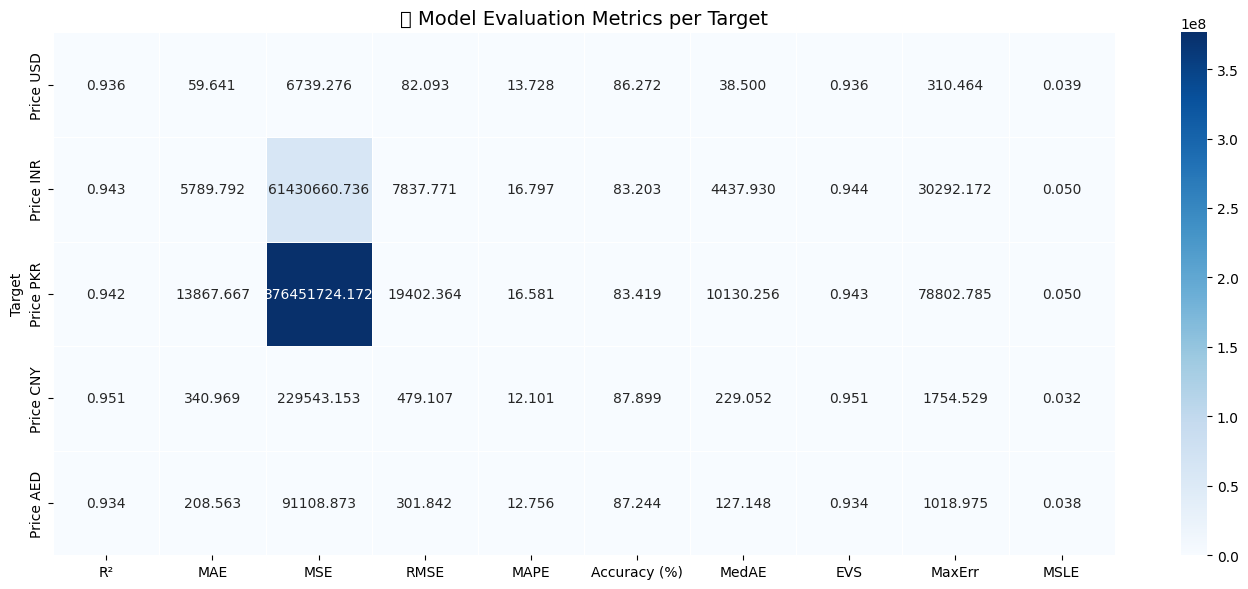

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_11104\571747930.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=df_metrics, x="Target", y="Accuracy (%)", palette="viridis")
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_11104\571747930.py:40: UserWarning: Glyph 9989 (\N{WHITE HEAVY CHECK MARK}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\ADMIN\AppData\Local\Programs\Python\Python313\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 9989 (\N{WHITE HEAVY CHECK MARK}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


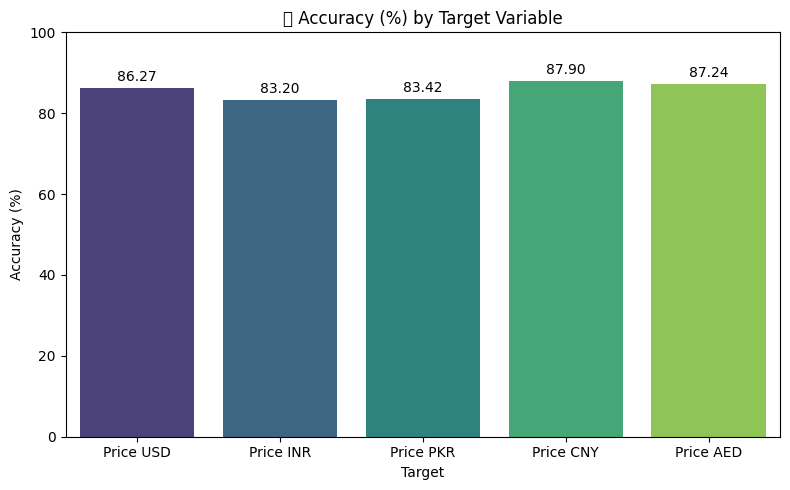

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_11104\571747930.py:56: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\ADMIN\AppData\Local\Programs\Python\Python313\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


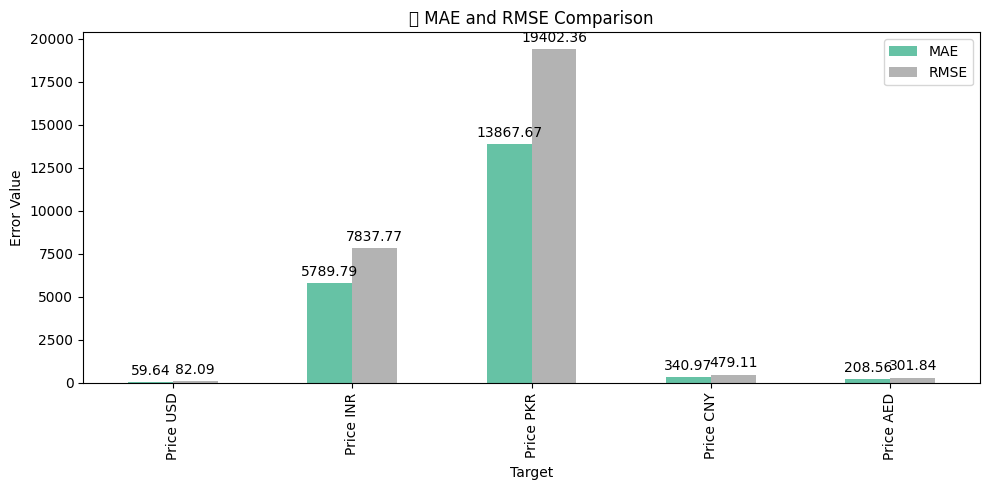

In [9]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# ─── Collect metrics into a DataFrame ───
metrics_data = {
    "Target": ["Price USD", "Price INR", "Price PKR", "Price CNY", "Price AED"],
    "R²": [0.9361, 0.9429, 0.9421, 0.9513, 0.9337],
    "MAE": [59.6407, 5789.7916, 13867.6672, 340.9687, 208.5631],
    "MSE": [6739.2763, 61430660.7355, 376451724.1722, 229543.1530, 91108.8730],
    "RMSE": [82.0931, 7837.7714, 19402.3639, 479.1066, 301.8425],
    "MAPE": [13.7278, 16.7972, 16.5808, 12.1014, 12.7556],
    "Accuracy (%)": [86.2722, 83.2028, 83.4192, 87.8986, 87.2444],
    "MedAE": [38.5003, 4437.9305, 10130.2563, 229.0520, 127.1476],
    "EVS": [0.9362, 0.9436, 0.9429, 0.9514, 0.9340],
    "MaxErr": [310.4645, 30292.1717, 78802.7846, 1754.5290, 1018.9750],
    "MSLE": [0.0387, 0.0500, 0.0499, 0.0316, 0.0379],
}

df_metrics = pd.DataFrame(metrics_data)


# ───  Heatmap of all metrics ───
plt.figure(figsize=(14, 6))
sns.heatmap(df_metrics.set_index("Target").round(3), annot=True, cmap="Blues", fmt=".3f", linewidths=0.5)
plt.title(" Model Evaluation Metrics per Target", fontsize=14)
plt.tight_layout()
plt.show()


# ───  Accuracy (%) barplot ───
plt.figure(figsize=(8, 5))
ax = sns.barplot(data=df_metrics, x="Target", y="Accuracy (%)", palette="viridis")
plt.title(" Accuracy (%) by Target Variable")
plt.ylim(0, 100)
plt.ylabel("Accuracy (%)")

# Add value labels on top of bars
for container in ax.containers:
    ax.bar_label(container, fmt='%.2f', label_type='edge', padding=3)

plt.tight_layout()
plt.show()


# ─── MAE vs RMSE plot ───
fig, ax2 = plt.subplots(figsize=(10, 5))
bar_plot = df_metrics.plot(
    x="Target", y=["MAE", "RMSE"], kind="bar", ax=ax2, colormap="Set2"
)
plt.title(" MAE and RMSE Comparison")
plt.ylabel("Error Value")

# Add value labels on grouped bars
for container in ax2.containers:
    ax2.bar_label(container, fmt='%.2f', label_type='edge', padding=3)

plt.tight_layout()
plt.show()
